In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import plotly.io as pio
pio.renderers.default = 'browser'


plt.style.use('fivethirtyeight')
%matplotlib inline

In [30]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [31]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.385578,35.250705,26.768000,28.908797,855215656
2007-10-08,30.727665,33.480117,30.534510,33.480117,126671715
2007-10-09,32.820175,33.109906,29.085854,30.743763,116725709
2007-10-10,33.125999,33.802041,32.836269,33.673270,67931378
2007-10-11,36.828125,38.630901,32.836267,38.630901,106320954


In [32]:
df.shape

(4208, 5)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [34]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [35]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,79.255945,80.286305,78.238144,79.292803,1.188963e+07
std,63.621687,64.365266,62.829875,63.603316,2.061999e+07
min,18.908413,20.212441,16.952371,20.114639,0.000000e+00
25%,36.349711,36.923184,35.812882,36.386932,4.799653e+06
50%,55.232336,55.870061,54.493150,55.338369,8.344398e+06
75%,82.704779,83.691958,81.724070,82.727265,1.362032e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [36]:
df = df.reset_index()

In [37]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [38]:
df.to_csv("powergrid.csv")

In [39]:
data01 = pd.read_csv("powergrid.csv")

In [40]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.38557815551758,35.250704510369104,26.767999775913133,28.908796765471156,855215656
2,1,2007-10-08,30.727664947509766,33.48011655616869,30.534509606022688,33.48011655616869,126671715
3,2,2007-10-09,32.82017517089844,33.10990603070133,29.085854182395227,30.743762670622203,116725709
4,3,2007-10-10,33.125999450683594,33.80204096867718,32.83626861907928,33.67327001215155,67931378


In [41]:
# Candlesticks 
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'], 
                                    high = data01['High'],
                                    low = data01['Low'], 
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [42]:
# Drop columns only if they exist in the DataFrame
columns_to_drop = ['Date', 'Adj Close']
df = df.drop([col for col in columns_to_drop if col in df.columns], axis=1)

C:\Users\kisla\AppData\Local\Temp\ipykernel_17056\2808446554.py:3: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [43]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.385578,35.250705,26.768000,28.908797,855215656
1,30.727665,33.480117,30.534510,33.480117,126671715
2,32.820175,33.109906,29.085854,30.743763,116725709
3,33.125999,33.802041,32.836269,33.673270,67931378
4,36.828125,38.630901,32.836267,38.630901,106320954


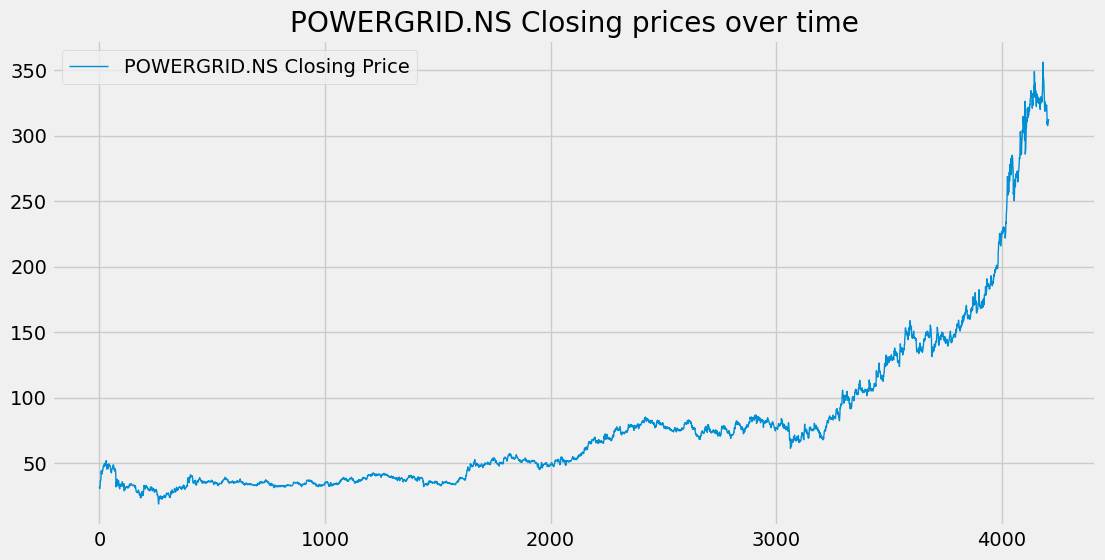

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

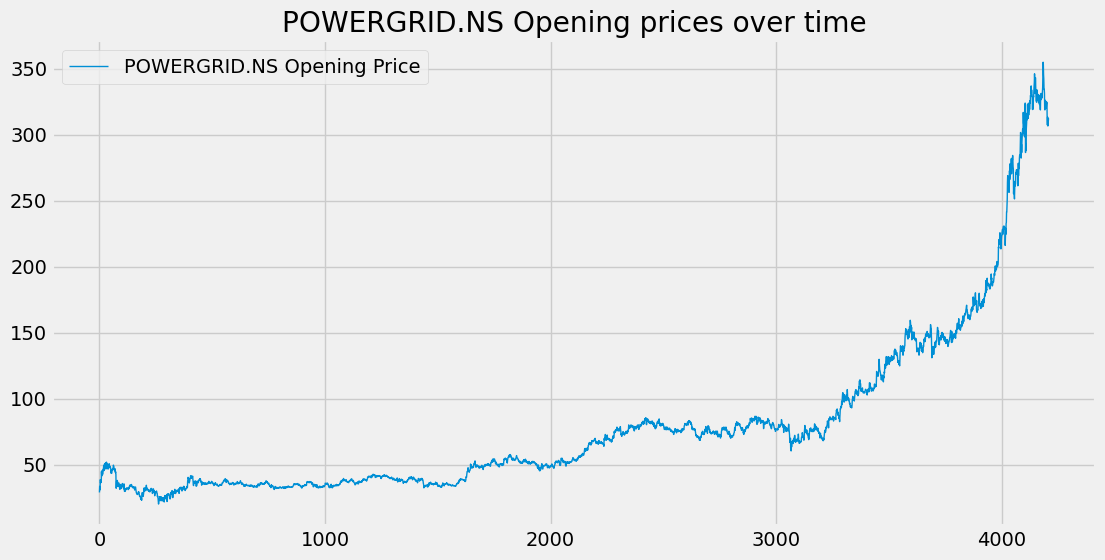

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

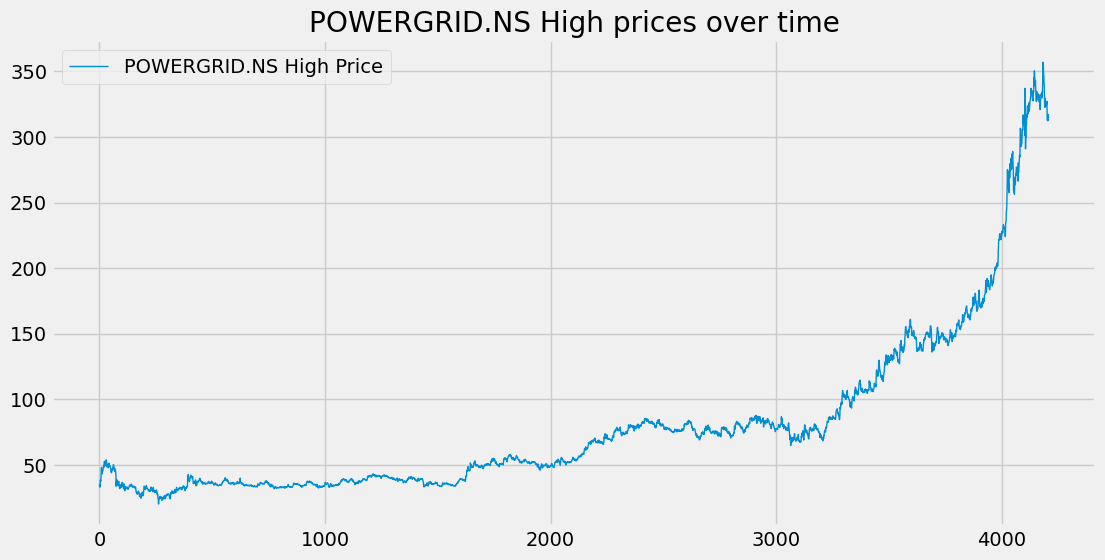

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

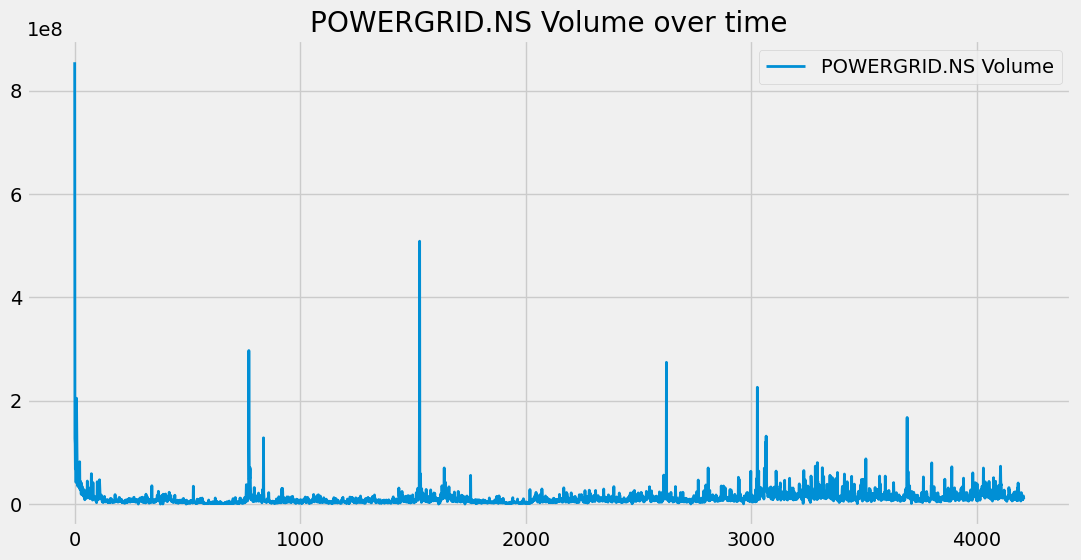

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [48]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [49]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [50]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [51]:
ma100 = df.Close.rolling(100).mean()

In [52]:
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,324.993563
4204,325.235133
4205,325.471086
4206,325.670629


In [53]:
ma200 = df.Close.rolling(200).mean()

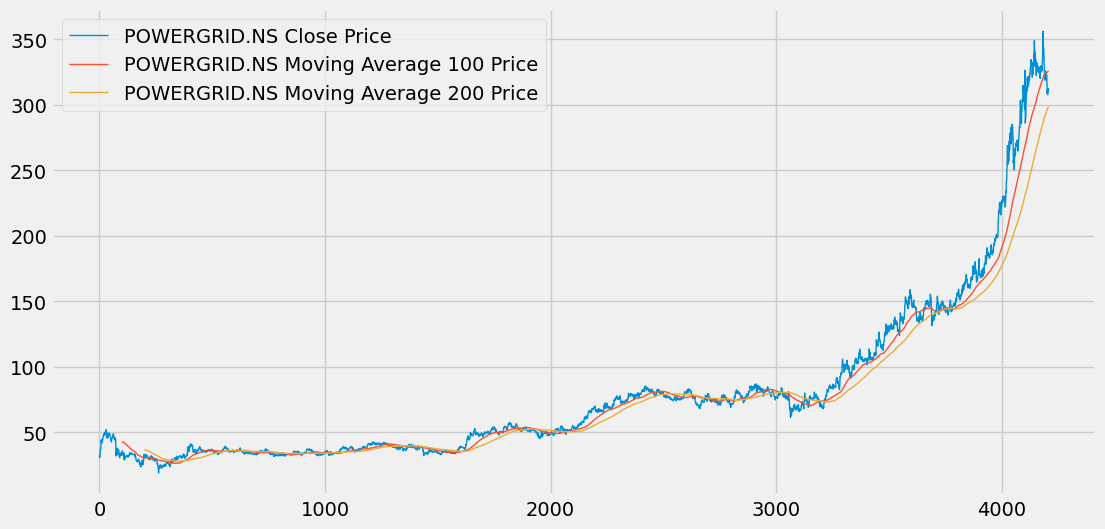

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [55]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [56]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

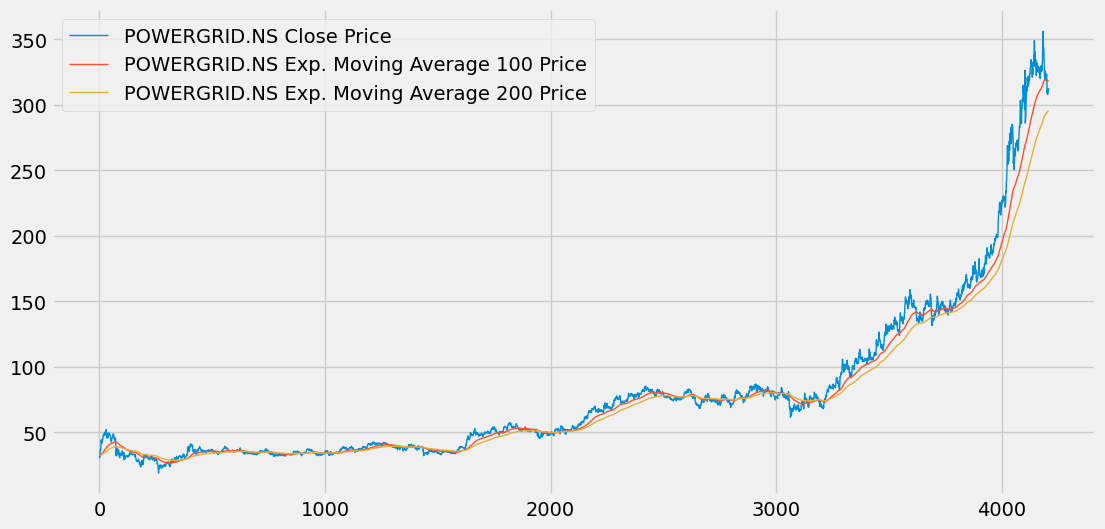

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [58]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [59]:
data_training.shape

(2945, 1)

In [60]:
data_testing.shape

(1263, 1)

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [62]:
data_training_array = scaler.fit_transform(data_training)

In [63]:
data_training_array

array([[0.19808596],
       [0.17371813],
       [0.20447362],
       ...,
       [0.907744  ],
       [0.86000376],
       [0.87299629]])

In [64]:
data_training_array.shape[0]

2945

In [65]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [66]:
x_train.shape

(2845, 100, 1)

In [67]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

LSTM Input -> 3D Array (batch_size, time_steps, seq_len)
LSTM 2D OR 3D
2D -> (batch_sizem units)
3D -> (batch_size, time_steps, units)

In [68]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [69]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 0.0859
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0085
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0074
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0069
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0061
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0058
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0058
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0054
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0052
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0048
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0047
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0048
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0043
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0039
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0035
Epoc

In [71]:
past_100_days = data_training.tail(100)

In [72]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [73]:
final_df.head()

Ticker,POWERGRID.NS
0,75.731834
1,77.275734
2,77.539825
3,77.377304
4,77.824226


In [74]:
input_data = scaler.fit_transform(final_df)

In [75]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [76]:
x_test.shape

(1263, 100, 1)

In [77]:
y_predicted = model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [78]:
y_predicted.shape

(1263, 1)

In [79]:
scaler.scale_

array([0.00339369])

In [80]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

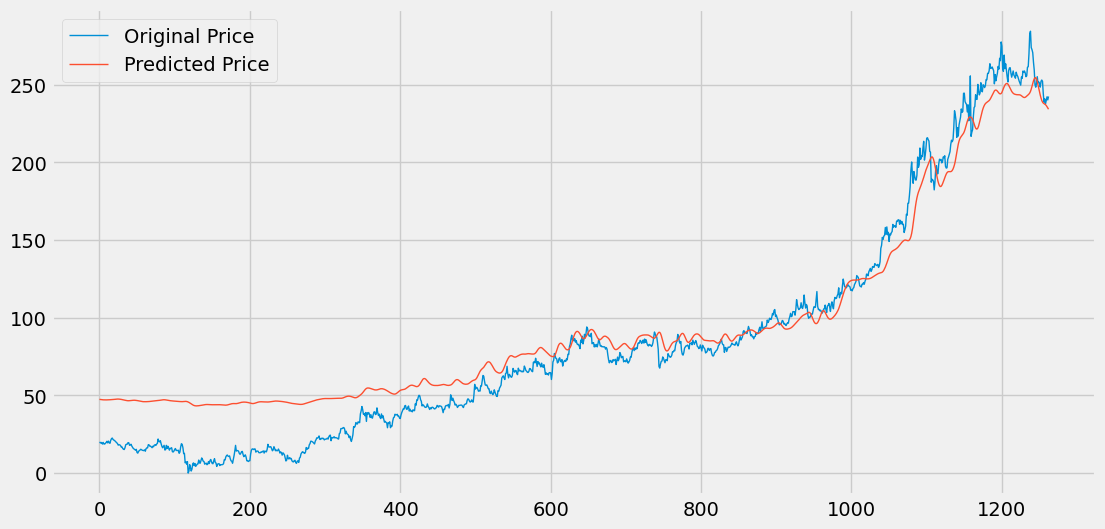

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [82]:
model.save('stock_dl_model.h5')